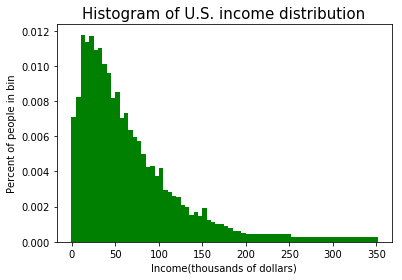

In [12]:
#1.(a)
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as opt
import scipy.stats as stats
from numpy.linalg import pinv

f, m = np.loadtxt('usincmoms.txt', unpack=True)
m_1 = np.delete(m, [40, 41], None)
m_1 = np.array(m_1)/1000
f_1 = np.delete(f, [40,41], None)
f_2 = np.append(f_1/5, [0.018970145/50,0.023190321/100])

plt.title('Histogram of U.S. income distribution', fontsize=15)
plt.xlabel(r'Income(thousands of dollars)')
plt.ylabel(r'Percent of people in bin')
plt.bar(m_1, height=f_1/5, width=5, align='center', color='G', edgecolor="G", linewidth=3)
plt.bar(225, height=0.018970145/50 , width=50, bottom=0, align='center', color='G', edgecolor="G", linewidth=3)
plt.bar(300, height=0.023190321/100, width=100, bottom=0, align='center',color='G', edgecolor="G", linewidth=3)
plt.show()

In [13]:
a = np.array(m_1)-2.5
a = np.append(a, [200, 250], None)
b = np.array(m_1)+2.5
b = np.append(b, [250, 350], None)
f = np.append(f_1, [0.018970145,0.023190321], None)


def model_moments_lognorm(mu, sigma):
    y = stats.lognorm.cdf(b, sigma, scale = np.exp(mu))-stats.lognorm.cdf(a, sigma, scale = np.exp(mu))
    return y


def err_vec_lognorm(xvals, mu, sigma): 
    moms_data = xvals
    moms_model = model_moments_lognorm(mu, sigma)
    err_vec = (moms_model - moms_data)/moms_data
    return err_vec


def criterion_lognorm(params, *args):
    mu, sigma = params
    xvals, W = args
    err = err_vec_lognorm(xvals, mu, sigma)
    crit_val = np.dot(np.dot(err.T, W), err) 
    return crit_val


In [14]:
#1.(b)
inc = np.sum(np.array(m)*np.array(f))/1000
mu_lognorm_init = np.log(m.mean())
sig_lognorm_init = np.log(m.std())

params_lognorm_init = np.array([mu_lognorm_init, sig_lognorm_init])
W_hat = np.diag(f)
gmm_args = (f, W_hat)

results_lognorm = opt.minimize(criterion_lognorm, params_lognorm_init, args=(gmm_args),method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
mu_GMM_lognorm, sig_GMM_lognorm = results_lognorm.x
print(results_lognorm)
print('mu_GMM_lognorm=', mu_GMM_lognorm, ' sig_GMM_lognorm=', sig_GMM_lognorm)

      fun: 0.035516481332649105
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -7.00134395e-07,   1.28369537e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 105
      nit: 17
   status: 0
  success: True
        x: array([ 3.89344523,  0.97573656])
mu_GMM_lognorm= 3.89344522538  sig_GMM_lognorm= 0.975736555752


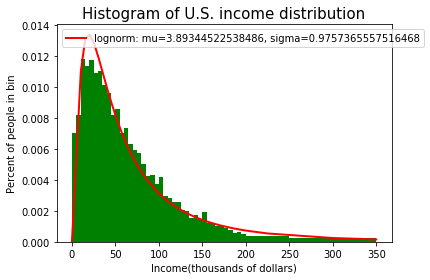

In [15]:
plt.title('Histogram of U.S. income distribution', fontsize=15)
plt.xlabel(r'Income(thousands of dollars)')
plt.ylabel(r'Percent of people in bin')

plt.bar(m_1, height=f_1/5, width=5, align='center', color='G')
plt.bar(225, height=0.018970145/50 , width=50, bottom=0, align='center', color='G')
plt.bar(300, height=0.023190321/100, width=100, bottom=0, align='center',color='G')

dist_pts = np.linspace(0, 200, 40)
dist_pts = np.append(dist_pts, [225,300,350])
plt.plot(dist_pts, stats.lognorm.pdf(dist_pts, sig_GMM_lognorm, scale = np.exp(mu_GMM_lognorm)),
         linewidth=2, color='r', label='lognorm: mu={}, sigma={}'.format(mu_GMM_lognorm, sig_GMM_lognorm))
plt.legend(loc='upper left')
plt.show()


In [16]:
#1.(c)
def model_moments_gamma(alpha, beta):
    y = stats.gamma.cdf(b, alpha, scale = beta)-stats.gamma.cdf(a, alpha, scale = beta)
    return y


def err_vec_gamma(xvals, alpha, beta): 
    moms_data = xvals
    moms_model = model_moments_gamma(alpha, beta)
    err_vec = (moms_model - moms_data)/moms_data
    return err_vec


def criterion_gamma(params, *args):
    alpha, beta = params
    xvals, W = args
    err = err_vec_gamma(xvals, alpha, beta)
    crit_val = np.dot(np.dot(err.T, W), err) 
    return crit_val


alpha_gamma_init = 3
beta_gamma_init = 20
params_gamma_init = np.array([alpha_gamma_init, beta_gamma_init])


results_gamma = opt.minimize(criterion_gamma, params_gamma_init, args=(gmm_args),method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
alpha_GMM_gamma, beta_GMM_gamma = results_gamma.x
print(results_gamma)
print('alpha_GMM_gamma=', alpha_GMM_gamma, ' beta_GMM_gamma=', beta_GMM_gamma)

      fun: 0.014084919477131823
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -2.30353930e-06,  -9.35015954e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 48
      nit: 14
   status: 0
  success: True
        x: array([  1.36707525,  48.06181998])
alpha_GMM_gamma= 1.36707525112  beta_GMM_gamma= 48.0618199832


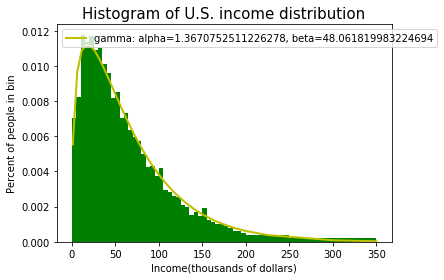

In [17]:
plt.title('Histogram of U.S. income distribution', fontsize=15)
plt.xlabel(r'Income(thousands of dollars)')
plt.ylabel(r'Percent of people in bin')

plt.bar(m_1, height=f_1/5, width=5, align='center', color='G')
plt.bar(225, height=0.018970145/50 , width=50, bottom=0, align='center', color='G')
plt.bar(300, height=0.023190321/100, width=100, bottom=0, align='center',color='G')

dist_pts = np.linspace(1, 200, 40)
dist_pts = np.append(dist_pts, [225,300,350])
plt.plot(dist_pts, stats.gamma.pdf(dist_pts, alpha_GMM_gamma, scale = beta_GMM_gamma),
         linewidth=2, color='Y', label='gamma: alpha={}, beta={}'.format(alpha_GMM_gamma, beta_GMM_gamma))
plt.legend(loc='upper left')
plt.show()

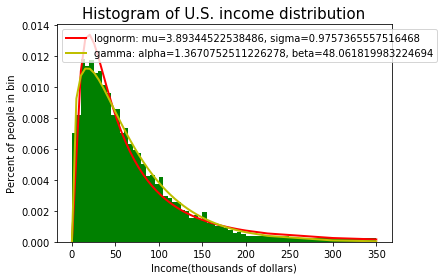

      fun: 0.035516481332649105
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -7.00134395e-07,   1.28369537e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 105
      nit: 17
   status: 0
  success: True
        x: array([ 3.89344523,  0.97573656])
      fun: 0.014084919477131823
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -2.30353930e-06,  -9.35015954e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 48
      nit: 14
   status: 0
  success: True
        x: array([  1.36707525,  48.06181998])


In [18]:
#1.(d)
plt.title('Histogram of U.S. income distribution', fontsize=15)
plt.xlabel(r'Income(thousands of dollars)')
plt.ylabel(r'Percent of people in bin')

plt.bar(m_1, height=f_1/5, width=5, align='center', color='G')
plt.bar(225, height=0.018970145/50 , width=50, bottom=0, align='center', color='G')
plt.bar(300, height=0.023190321/100, width=100, bottom=0, align='center',color='G')

dist_pts = np.linspace(0, 200, 40)
dist_pts = np.append(dist_pts, [225,300,350])
plt.plot(dist_pts, stats.lognorm.pdf(dist_pts, sig_GMM_lognorm, scale = np.exp(mu_GMM_lognorm)),
         linewidth=2, color='r', label='lognorm: mu={}, sigma={}'.format(mu_GMM_lognorm, sig_GMM_lognorm))
plt.legend(loc='upper left')
plt.plot(dist_pts, stats.gamma.pdf(dist_pts, alpha_GMM_gamma, scale = beta_GMM_gamma),
         linewidth=2, color='y', label='gamma: alpha={}, beta={}'.format(alpha_GMM_gamma, beta_GMM_gamma))
plt.legend(loc='upper left')

plt.show()
print(results_lognorm)
print(results_gamma)

#gamma distribution fits the data better, because the criterion result is less. 

In [19]:
#1.(e)
alpha_gamma_first=2.85
beta_gamma_first=20
params_gamma_first = np.array([alpha_gamma_first, beta_gamma_first])
W_hat_first = np.eye(42)
gmm_args_first = (f, W_hat_first)
results_gamma_first = opt.minimize(criterion_gamma, params_gamma_first, args=(gmm_args_first),method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
alpha_GMM_gamma_first, beta_GMM_gamma_first = results_gamma_first.x
print(results_gamma_first)
print('alpha_GMM_gamma_first=', alpha_GMM_gamma_first, ' beta_GMM_gamma_first=', beta_GMM_gamma_first)


err_gamma = np.reshape(err_vec_gamma(f, alpha_GMM_gamma_first, beta_GMM_gamma_first),(42,1))
omega = (err_gamma @ err_gamma.T)/ 42
W_hat_second = pinv(omega)


params_gamma_second = np.array([alpha_GMM_gamma_first, beta_GMM_gamma_first])
gmm_args_second = (f, W_hat_second)

results_gamma_second = opt.minimize(criterion_gamma, params_gamma_second, args=(gmm_args_second),method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
alpha_GMM_gamma_second, beta_GMM_gamma_second = results_gamma_second.x
print(results_gamma_second)
print('alpha_GMM_gamma_second=', alpha_GMM_gamma_second, ' beta_GMM_gamma_second=', beta_GMM_gamma_second)



      fun: 0.73889292648437244
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  3.57047725e-05,   6.66133815e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 54
      nit: 16
   status: 0
  success: True
        x: array([  1.37435761,  46.21161449])
alpha_GMM_gamma_first= 1.3743576088  beta_GMM_gamma_first= 46.2116144947
      fun: 41.999999978980021
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00027356,  0.00021387])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 9
      nit: 1
   status: 0
  success: True
        x: array([  1.37432876,  46.21160903])
alpha_GMM_gamma_second= 1.37432875874  beta_GMM_gamma_second= 46.2116090327


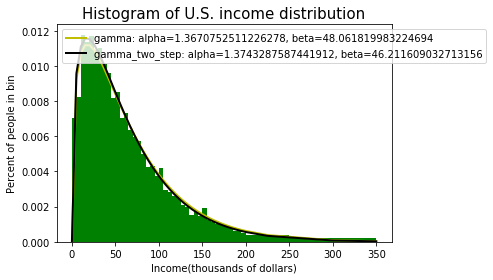

0.0140849194771
41.999999979


In [20]:
plt.title('Histogram of U.S. income distribution', fontsize=15)
plt.xlabel(r'Income(thousands of dollars)')
plt.ylabel(r'Percent of people in bin')

plt.bar(m_1, height=f_1/5, width=5, align='center', color='G')
plt.bar(225, height=0.018970145/50 , width=50, bottom=0, align='center', color='G')
plt.bar(300, height=0.023190321/100, width=100, bottom=0, align='center',color='G')

dist_pts = np.linspace(0, 200, 40)
dist_pts = np.append(dist_pts, [225,300,350])
plt.plot(dist_pts, stats.gamma.pdf(dist_pts, alpha_GMM_gamma, scale = beta_GMM_gamma),
         linewidth=2, color='y', label='gamma: alpha={}, beta={}'.format(alpha_GMM_gamma, beta_GMM_gamma))
plt.legend(loc='upper left')
plt.plot(dist_pts, stats.gamma.pdf(dist_pts, alpha_GMM_gamma_second, scale = beta_GMM_gamma_second),
         linewidth=2, color='k', label='gamma_two_step: alpha={}, beta={}'.format(alpha_GMM_gamma_second, beta_GMM_gamma_second))
plt.legend(loc='upper left')

plt.show()
print(results_gamma.fun)
print(results_gamma_second.fun)
#alpha, beta don't change very much.
#the weight matrix is different so we can‘t compare two methods. 



In [21]:
#2.(a)
from scipy.stats import norm 

c, k, w, r = np.loadtxt('MacroSeries.txt', delimiter=',', unpack=True)

def func_z(alpha, r, k):
    z = np.log(r/(alpha*k**(alpha-1)))
    return z

def model_moments_4(alpha, beta, rho, mu, c, k, w, r):
    z = func_z(alpha, r, k)
    z_t_1 = z[0:99]
    z_t_2 = z[1:100]
    k_t_1 = k[0:99]
    k_t_2 = k[1:100]
    c_t_1 = c[0:99]
    c_t_2 = c[1:100]
    w_t_1 = w[0:99]
    w_t_2 = w[1:100]
    mom1 = (z_t_2-rho*z_t_1-(1-rho)*mu).mean()
    mom2 = ((z_t_2-rho*z_t_1-(1-rho)*mu)*z_t_1).mean()
    mom3 = (beta*alpha*np.exp(z_t_2)*k_t_2**(alpha-1)*c_t_1/c_t_2-1).mean()
    mom4 = ((beta*alpha*np.exp(z_t_2)*k_t_2**(alpha-1)*c_t_1/c_t_2-1)*w_t_1).mean()
    return mom1, mom2, mom3, mom4

def err_vec_4(alpha, beta, rho, mu, c, k, w, r):
    mom1, mom2, mom3, mom4 = model_moments_4(alpha, beta, rho, mu, c, k, w, r)
    err_vec = np.array([mom1, mom2, mom3, mom4])          
    return err_vec.T

def criteron_4(params, args):
    alpha, beta, rho, mu = params
    c, k, w, r = args
    W = np.eye(4)
    err = err_vec_4(alpha, beta, rho, mu, c, k, w, r)
    crit_val = np.dot(np.dot(err.T, W), err) 
    return crit_val
                           

In [22]:
alpha_init = 0.3
beta_init = 0.9
rho_init = 0.9
mu_init = 9.5
params_init = np.array([alpha_init, beta_init, rho_init, mu_init])
bd = ((1e-10, 1-1e-10),(1e-10, 1-1e-10), (-1+1e-10,1-1e-10),(1e-10, None))
args_4 = np.array([c, k, w, r])

result_4 = opt.minimize(criteron_4, params_init, args = args_4, method = 'L-BFGS-B', bounds = bd)
alpha_4, beta_4, rho_4, mu_4 = result_4.x
print(result_4)
print('alpha_GMM=', alpha_4)
print('beta_GMM=', beta_4)
print('rho_GMM=', rho_4)
print('mu_GMM=', mu_4)
print('minimized criterion function=', result_4.fun)


      fun: 0.0028786218307831255
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.40150740e-01,   1.23133558e+03,  -2.93281545e-04,
        -8.13073393e-03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 230
      nit: 37
   status: 0
  success: True
        x: array([ 0.45005284,  0.99      ,  0.96073656,  9.50074281])
alpha_GMM= 0.450052844246
beta_GMM= 0.989999995006
rho_GMM= 0.960736559318
mu_GMM= 9.50074281234
minimized criterion function= 0.00287862183078


(4, 100)

ValueError: too many values to unpack (expected 2)